In [33]:
# Import libraries
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [34]:
# Import data from excel files
df1 = pd.read_excel('Formative Assessment I_class_UKG.xlsx');
df2 = pd.read_excel('Formative Assessment-2_class_UKG.xlsx');
df3 = pd.read_excel('Half Yearly Exam_class_UKG.xlsx');

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True);

# print the head
df.head()

,Academic session,Exam Name,Exam Mode,Subject Name,Subject Status,Full Mark,Pass Mark,Negative Percentage,Student Name,Class,Section,Roll No,Marks Secured,Result
0,2022-2023,Formative Assessment I,Offline,Hindi,Evaluating,25,7,0 %,Rupam Sukla,UKG,A,1,18.0,Pass
1,2022-2023,Formative Assessment I,Offline,EVS,Evaluating,25,7,0 %,Rupam Sukla,UKG,A,1,14.0,Pass
2,2022-2023,Formative Assessment I,Offline,Oral Maths,Evaluating,10,3,0 %,Rupam Sukla,UKG,A,1,8.0,Pass
3,2022-2023,Formative Assessment I,Offline,Oral English,Evaluating,10,3,0 %,Rupam Sukla,UKG,A,1,7.0,Pass
4,2022-2023,Formative Assessment I,Offline,Drawing,Evaluating,25,7,0 %,Rupam Sukla,UKG,A,1,22.0,Pass


In [35]:
# Get all the Subject names
subjects = df['Subject Name'].unique();

# Get all the students
students = df['Student Name'].unique();

# Get all the Exam names
exams = df['Exam Name'].unique();

In [36]:
# Create a new dataframe for students data
df_new = pd.DataFrame(students, columns=['Student Name']);

# Loop through all the students
for student in students:
    # Find the first row of the student in the dataframe
    row = df.loc[df['Student Name'] == student].iloc[0];
    # Add the Class, Section, Roll No to the new dataframe
    df_new.loc[df_new['Student Name'] == student, 'Class'] = row['Class'];
    df_new.loc[df_new['Student Name'] == student, 'Section'] = row['Section'];
    df_new.loc[df_new['Student Name'] == student, 'Roll No'] = row['Roll No'];

df_new.head()

,Student Name,Class,Section,Roll No
0,Rupam Sukla,UKG,A,1.0
1,Ipsita Das,UKG,A,2.0
2,Md.Sanawaj,UKG,A,3.0
3,Ayushi kundu,UKG,A,4.0
4,Jiya Rongpi,UKG,A,5.0


In [37]:
# Add columns for each exam and subject
for exam in exams:
    for subject in subjects:
        df_new[exam + '_' + subject] = 0;


df_new.head()      

,Student Name,Class,Section,Roll No,Formative Assessment I_Hindi,Formative Assessment I_EVS,Formative Assessment I_Oral Maths,Formative Assessment I_Oral English,Formative Assessment I_Drawing,Formative Assessment I_Maths,...,Formative Assessment-2_Oral Hindi,Half Yearly Exam_Hindi,Half Yearly Exam_EVS,Half Yearly Exam_Oral Maths,Half Yearly Exam_Oral English,Half Yearly Exam_Drawing,Half Yearly Exam_Maths,Half Yearly Exam_English,Half Yearly Exam_Rhymes,Half Yearly Exam_Oral Hindi
0,Rupam Sukla,UKG,A,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ipsita Das,UKG,A,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Md.Sanawaj,UKG,A,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ayushi kundu,UKG,A,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Jiya Rongpi,UKG,A,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Add marks to the new dataframe
for student in students:
    for exam in exams:
        for subject in subjects:
            # Check if the row of the student esist in the dataframe
            if df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].empty:
                # If it doesn't exist, add 0 to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = 0;
            else:
                # If it exists, get the row
                row = df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].iloc[0];
                # Add the marks to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = row['Marks Secured'];
df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment I_Hindi,Formative Assessment I_EVS,Formative Assessment I_Oral Maths,Formative Assessment I_Oral English,Formative Assessment I_Drawing,Formative Assessment I_Maths,...,Formative Assessment-2_Oral Hindi,Half Yearly Exam_Hindi,Half Yearly Exam_EVS,Half Yearly Exam_Oral Maths,Half Yearly Exam_Oral English,Half Yearly Exam_Drawing,Half Yearly Exam_Maths,Half Yearly Exam_English,Half Yearly Exam_Rhymes,Half Yearly Exam_Oral Hindi
0,Rupam Sukla,UKG,A,1.0,18.0,14,8,7,22,20,...,10,48,22,24,23,33,44,34.5,40,18
1,Ipsita Das,UKG,A,2.0,25.0,25,10,9,25,25,...,10,49,42,28,25,46,48,47.5,30,30
2,Md.Sanawaj,UKG,A,3.0,6.0,5,3,5,13,5,...,8,13,9,13,19,13,0,7.0,10,13
3,Ayushi kundu,UKG,A,4.0,20.5,24,10,10,21,22,...,9,47,28,25,28,28,43,38.0,50,29
4,Jiya Rongpi,UKG,A,5.0,21.0,11,9,8,14,17,...,8,49,20,20,20,41,42,36.5,40,14


In [39]:
# Add weightage column for each subject
for subject in subjects:
    df_new['Weightage ' + subject] = np.nan;

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment I_Hindi,Formative Assessment I_EVS,Formative Assessment I_Oral Maths,Formative Assessment I_Oral English,Formative Assessment I_Drawing,Formative Assessment I_Maths,...,Half Yearly Exam_Oral Hindi,Weightage Hindi,Weightage EVS,Weightage Oral Maths,Weightage Oral English,Weightage Drawing,Weightage Maths,Weightage English,Weightage Rhymes,Weightage Oral Hindi
0,Rupam Sukla,UKG,A,1.0,18.0,14,8,7,22,20,...,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ipsita Das,UKG,A,2.0,25.0,25,10,9,25,25,...,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Md.Sanawaj,UKG,A,3.0,6.0,5,3,5,13,5,...,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ayushi kundu,UKG,A,4.0,20.5,24,10,10,21,22,...,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jiya Rongpi,UKG,A,5.0,21.0,11,9,8,14,17,...,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Calculate the weightage for each subject by taking the 40% from FA1, 40% from FA2 and 80% from Half Yearly
for subject in subjects:
    df_new['Weightage ' + subject] = df_new['Formative Assessment I_' + subject] * 0.4 + df_new['Formative Assessment-2_' + subject] * 0.4 + df_new['Half Yearly Exam_' + subject] * 0.8;

In [41]:
# Calculate the weightage result for each subject, pass if weightage is greater than 30 else fail
for subject in subjects:
    df_new['Result ' + subject] = np.where(df_new['Weightage ' + subject] >= 30, 'Pass', 'Fail');

In [42]:
# Add a total column for the weightage
df_new['Total Weightage'] = 0;

# Calculate the total weightage using a loop of all the subjects
for subject in subjects:
    df_new['Total Weightage'] += df_new['Weightage ' + subject];

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment I_Hindi,Formative Assessment I_EVS,Formative Assessment I_Oral Maths,Formative Assessment I_Oral English,Formative Assessment I_Drawing,Formative Assessment I_Maths,...,Result Hindi,Result EVS,Result Oral Maths,Result Oral English,Result Drawing,Result Maths,Result English,Result Rhymes,Result Oral Hindi,Total Weightage
0,Rupam Sukla,UKG,A,1.0,18.0,14,8,7,22,20,...,Pass,Fail,Fail,Fail,Pass,Pass,Pass,Pass,Fail,339.2
1,Ipsita Das,UKG,A,2.0,25.0,25,10,9,25,25,...,Pass,Pass,Pass,Fail,Pass,Pass,Pass,Pass,Pass,400.8
2,Md.Sanawaj,UKG,A,3.0,6.0,5,3,5,13,5,...,Fail,Fail,Fail,Fail,Fail,Fail,Fail,Fail,Fail,123.2
3,Ayushi kundu,UKG,A,4.0,20.5,24,10,10,21,22,...,Pass,Pass,Fail,Pass,Pass,Pass,Pass,Pass,Pass,380.4
4,Jiya Rongpi,UKG,A,5.0,21.0,11,9,8,14,17,...,Pass,Fail,Fail,Fail,Pass,Pass,Pass,Pass,Fail,341.0


In [43]:
# Add a result column
df_new['Result'] = '';

# Count the no of subjects
no_of_subjects = len(subjects);

# Total full marks
total_full_marks = no_of_subjects * 100;

# Add the total marks column
df_new['Total Marks'] = total_full_marks;

# Pass if total weightage is greater than 30% of total full marks
df_new.loc[df_new['Total Weightage'] > total_full_marks * 0.3, 'Result'] = 'Pass';

# Fail if total weightage is less than 30% of total full marks
df_new.loc[df_new['Total Weightage'] <= total_full_marks * 0.3, 'Result'] = 'Fail';

In [44]:
# Print the first row
df_new.iloc[0]

Student Name                           Rupam Sukla
Class                                          UKG
Section                                          A
Roll No                                        1.0
Formative Assessment I_Hindi                  18.0
Formative Assessment I_EVS                      14
Formative Assessment I_Oral Maths                8
Formative Assessment I_Oral English              7
Formative Assessment I_Drawing                  22
Formative Assessment I_Maths                    20
Formative Assessment I_English                16.0
Formative Assessment I_Rhymes                   20
Formative Assessment I_Oral Hindi               10
Formative Assessment-2_Hindi                  24.0
Formative Assessment-2_EVS                    13.5
Formative Assessment-2_Oral Maths                8
Formative Assessment-2_Oral English             10
Formative Assessment-2_Drawing                  12
Formative Assessment-2_Maths                  17.0
Formative Assessment-2_English 

In [45]:
df_new

,Student Name,Class,Section,Roll No,Formative Assessment I_Hindi,Formative Assessment I_EVS,Formative Assessment I_Oral Maths,Formative Assessment I_Oral English,Formative Assessment I_Drawing,Formative Assessment I_Maths,...,Result Oral Maths,Result Oral English,Result Drawing,Result Maths,Result English,Result Rhymes,Result Oral Hindi,Total Weightage,Result,Total Marks
0,Rupam Sukla,UKG,A,1.0,18.0,14,8,7,22,20,...,Fail,Fail,Pass,Pass,Pass,Pass,Fail,339.20,Pass,900
1,Ipsita Das,UKG,A,2.0,25.0,25,10,9,25,25,...,Pass,Fail,Pass,Pass,Pass,Pass,Pass,400.80,Pass,900
2,Md.Sanawaj,UKG,A,3.0,6.0,5,3,5,13,5,...,Fail,Fail,Fail,Fail,Fail,Fail,Fail,123.20,Fail,900
3,Ayushi kundu,UKG,A,4.0,20.5,24,10,10,21,22,...,Fail,Pass,Pass,Pass,Pass,Pass,Pass,380.40,Pass,900
4,Jiya Rongpi,UKG,A,5.0,21.0,11,9,8,14,17,...,Fail,Fail,Pass,Pass,Pass,Pass,Fail,341.00,Pass,900
5,Niraj pradhan,UKG,A,6.0,14.0,8,2,7,14,3,...,Fail,Fail,Fail,Pass,Pass,Pass,Fail,258.80,Fail,900
6,Anushka Brijbashi,UKG,A,7.0,22.5,4,10,9,22,24,...,Pass,Fail,Pass,Pass,Pass,Pass,Pass,360.00,Pass,900
7,Ringchen Tamang,UKG,A,8.0,25.0,23,10,10,24,24,...,Pass,Pass,Pass,Pass,Pass,Pass,Pass,430.80,Pass,900
8,Andrea Hazarika,UKG,A,9.0,23.0,13,8,10,16,20,...,Pass,Fail,Pass,Pass,Pass,Pass,Pass,394.80,Pass,900
9,Franki Islam,UKG,A,10.0,13.0,3,6,6,17,3,...,Fail,Fail,Pass,Pass,Fail,Pass,Fail,245.00,Fail,900


In [46]:
# Export the dataframe to excel
df_new.to_excel('Result.xlsx', index=False);

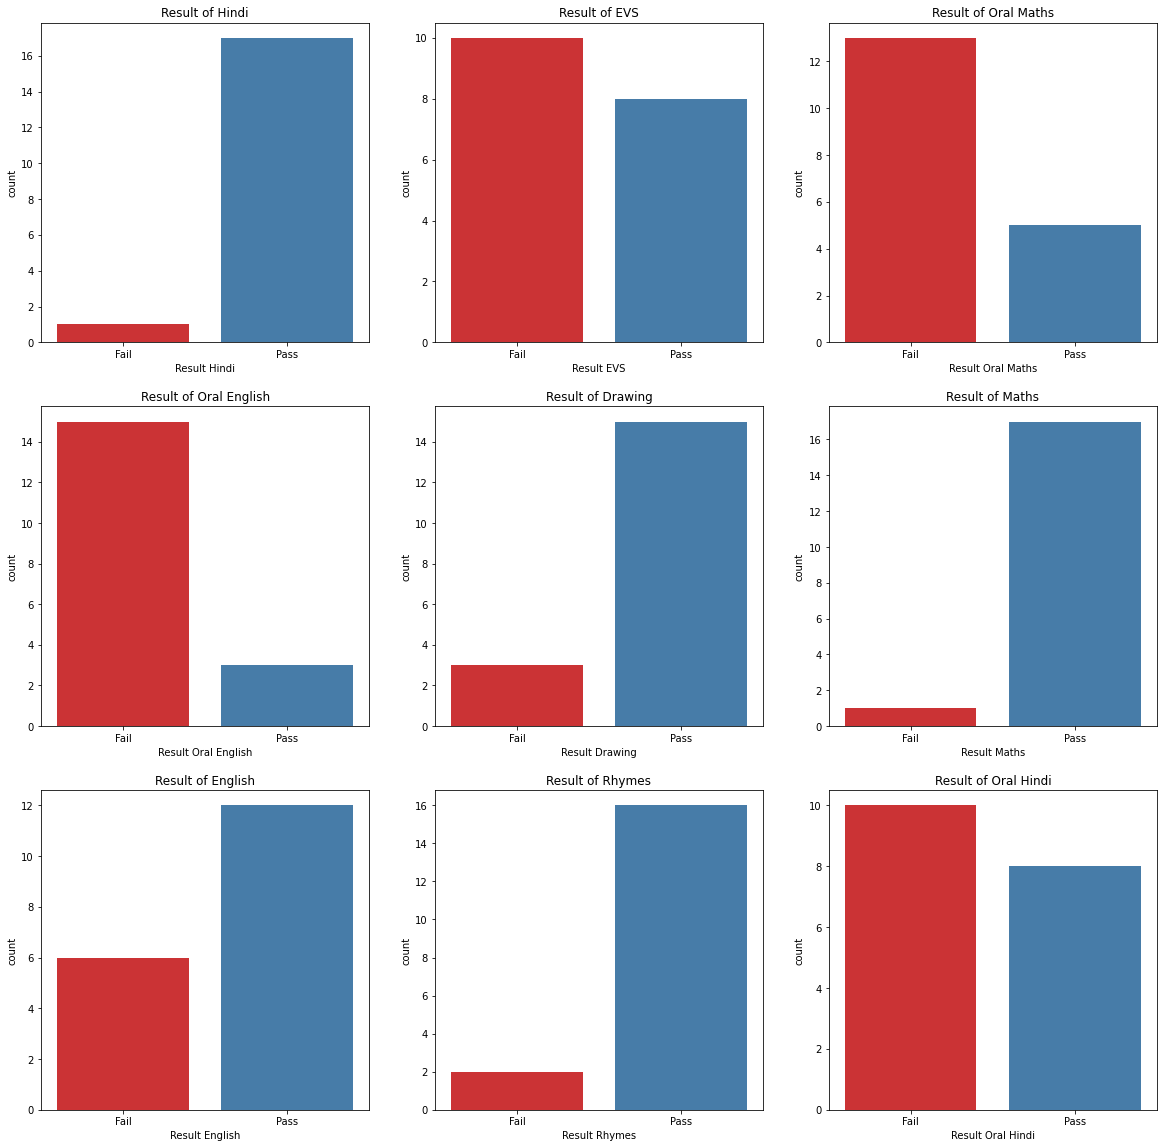

In [47]:
# Combine the charts in one figure
fig, axes = plt.subplots(3, 3, figsize=(20, 20));
for i, subject in enumerate(subjects):
    sns.countplot(x='Result ' + subject, data=df_new, palette='Set1', order=['Fail', 'Pass'], ax=axes[i // 3, i % 3]);
    axes[i // 3, i % 3].set_title('Result of ' + subject);
plt.show();